In [1]:
from cmeutils.structure import (
    bond_distribution,
    angle_distribution,
    dihedral_distribution,
)
from cmeutils.plotting import get_histogram

import gsd.hoomd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

import os

# Bond Distributions

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_680/707207575.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$L$[$\sigma$]")


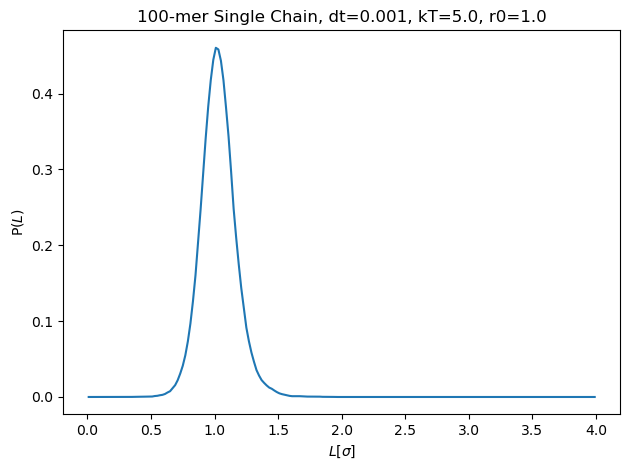

In [2]:
fig = plt.figure()
chains = 1
bond = "AA"
nbins=200
weight_dist = np.zeros(nbins)
adist = bond_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=bond[0],
    B_name=bond[1],
    histogram=True,
    normalize=True,
    start=0,
    bins=nbins
)
smooth = signal.savgol_filter(adist[:,1], window_length=7, polyorder=1)
weight_dist += smooth

plt.plot(adist[:,0], weight_dist/7, markersize=0)

plt.xlabel("$L$[$\sigma$]")
plt.ylabel("P($L$)")
plt.title("100-mer Single Chain, dt=0.001, kT=5.0, r0=1.0")
fig.tight_layout()

#### MuPT implementation using MDAnalysis 
##### (@jola3134| circa 7/2/25)

In [4]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))
from mugeo_distributions import mupt_bond_distribution

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_680/470000009.py:22: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$L$[$\sigma$]")


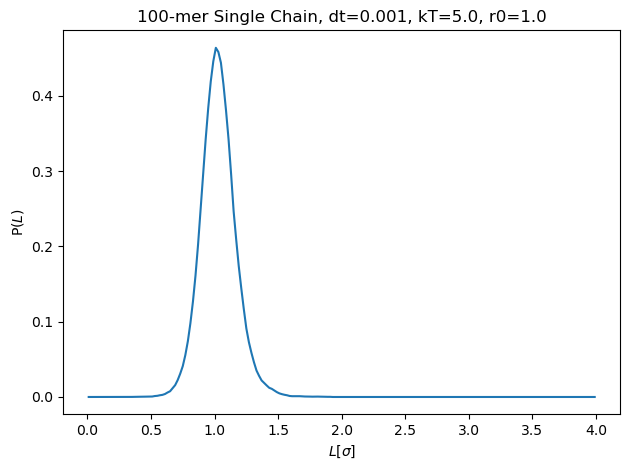

In [7]:
fig = plt.figure()
chains = 1
bond = "AA"
nbins=200
mupt_weight_dist = np.zeros(nbins)

bond_dist = mupt_bond_distribution(
    gsd_file=("trajectory1.gsd"),
    A_name=bond[0],
    B_name=bond[1],
    histogram=True,
    normalize=True,
    start=0,
    bins=nbins
)

smooth = signal.savgol_filter(bond_dist[:,1], window_length=7, polyorder=1)
mupt_weight_dist += smooth

plt.plot(bond_dist[:,0], mupt_weight_dist/7, markersize=0)

plt.xlabel("$L$[$\sigma$]")
plt.ylabel("P($L$)")
plt.title("100-mer Single Chain, dt=0.001, kT=5.0, r0=1.0")
fig.tight_layout()

#### Verify that the two methods give the same results

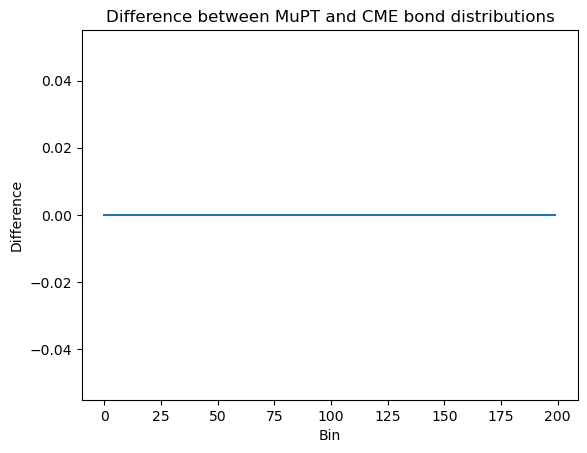

Max difference: 0.0


In [12]:
plt.plot((mupt_weight_dist/7) - (weight_dist/7))
plt.xlabel("Bin")
plt.ylabel("Difference")
plt.title("Difference between MuPT and CME bond distributions")
plt.show()
print("Max difference:", np.max(np.abs((mupt_weight_dist/7) - (weight_dist/7))))

# Angle Distributions

Text(0, 0.5, 'P($\\Theta$)')

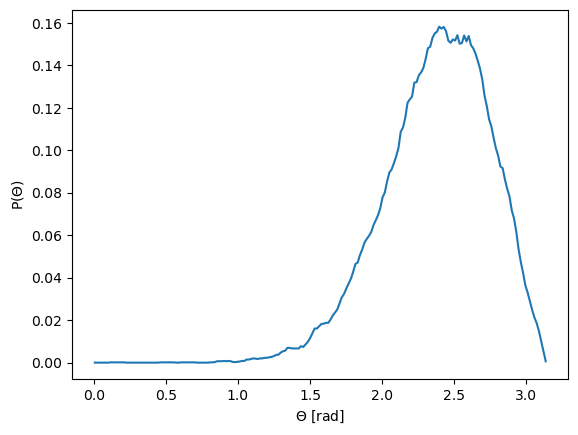

In [23]:
fig = plt.figure()
chains = 1
angle = "AAA"
nbins = 200
weight_dist = np.zeros(nbins)
adist = angle_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins
    )
smooth = signal.savgol_filter(adist[:,1], window_length=7, polyorder=1)
weight_dist += smooth

plt.plot(adist[:,0], weight_dist/7, markersize=0)
    
plt.xlabel("$\Theta$ [rad]")
plt.ylabel("P($\Theta$)")

# Torsion Distributions

Text(0, 0.5, 'P($\\Phi$)')

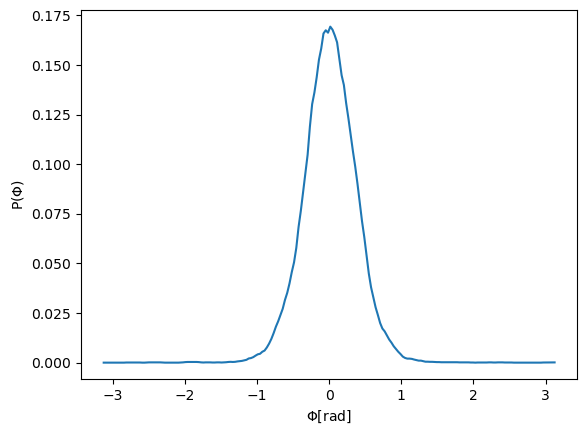

In [22]:
fig = plt.figure()
chains = 1
angle = "AAAA"
nbins = 200
weight_dist = np.zeros(nbins)
adist = dihedral_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    D_name=angle[3],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins
    )
smooth = signal.savgol_filter(adist[:,1], window_length=7, polyorder=1)
weight_dist += smooth

plt.plot(adist[:,0], weight_dist/7, markersize=0)
    
plt.xlabel("$\Phi$[rad]")
plt.ylabel("P($\Phi$)")